In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

C:\Program Files\Anaconda2\envs\pythonenvironment\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
#train1 = pd.read_csv('train.csv')
train1 = pd.read_csv('train1.csv')
test1 = pd.read_csv('test.csv')

In [3]:
train1.shape, test1.shape

((1460, 81), (1459, 80))

In [4]:
ALL_COLS = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']

TAKE_COLS = ['MSSubClass', 'MSZoning', 'LotFrontage','LotArea', 'LotShape', 'LandContour','LotConfig','LandSlope',
             'Neighborhood', 'BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','MasVnrArea',
             'ExterQual','Foundation','BsmtQual','BsmtCond', 'TotalBsmtSF', 'HeatingQC', 'CentralAir','Electrical',
             'GrLivArea','TotRmsAbvGrd','Fireplaces','GarageType','GarageQual','GarageCond','PavedDrive','SaleCondition']
             
CAT_COLS = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope','Neighborhood','BldgType',
            'HouseStyle','RoofStyle','ExterQual','Foundation','BsmtQual','BsmtCond','HeatingQC',
            'Electrical','GarageType','GarageQual','GarageCond','SaleCondition']

SPECIAL_COLS = ['CentralAir', 'PavelDrive']

TARGET = 'SalePrice'

In [5]:
train1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


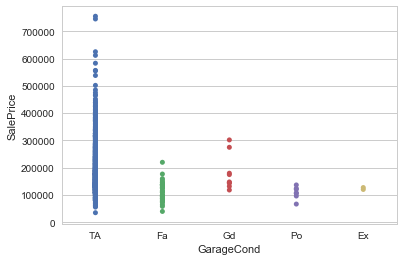

In [6]:
sns.stripplot(x="GarageCond", y="SalePrice", data=train1)

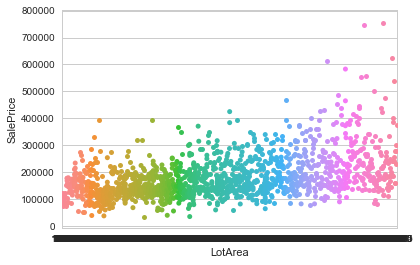

In [7]:
sns.stripplot(x="LotArea", y="SalePrice", data=train1)

In [8]:
train1['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [56]:
CAT_COLS

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'HeatingQC',
 'Electrical',
 'GarageType',
 'GarageQual',
 'GarageCond',
 'SaleCondition']

In [10]:
train1.loc[train1['SalePrice']>=30000,'CentralAir'].value_counts()
train1['CentralAir'].replace('Y',1,inplace=True)
train1['CentralAir'].replace('N', 0, inplace=True)

In [11]:
train1['CentralAir'].value_counts()

1    1365
0      95
Name: CentralAir, dtype: int64

In [12]:
train1.loc[train1['SalePrice']>=30000,'PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [13]:
train1['PavedDrive'].replace('Y',1,inplace=True)
train1['PavedDrive'].replace('P', 0, inplace=True)
train1['PavedDrive'].replace('N', -1, inplace=True)
train1['PavedDrive'].value_counts()

 1    1340
-1      90
 0      30
Name: PavedDrive, dtype: int64

In [14]:
train1.loc[train1['SalePrice']>=30000,'SaleCondition'].value_counts()

Normal    1198
others     262
Name: SaleCondition, dtype: int64

In [7]:
TOP_MSZoning = list(train1.loc[train1['SalePrice']>=30000,'MSZoning'].value_counts().index[:1])
TOP_LotShape = list(train1.loc[train1['SalePrice']>=30000,'LotShape'].value_counts().index[:2])
TOP_LandContour = list(train1.loc[train1['SalePrice']>=30000,'LandContour'].value_counts().index[:1])
TOP_LotConfig = list(train1.loc[train1['SalePrice']>=30000,'LotConfig'].value_counts().index[:1])
TOP_LandSlope = list(train1.loc[train1['SalePrice']>=30000,'LandSlope'].value_counts().index[:1])
TOP_Neighborhood = list(train1.loc[train1['SalePrice']>=30000,'Neighborhood'].value_counts().index[:1])
TOP_BldgType = list(train1.loc[train1['SalePrice']>=30000,'BldgType'].value_counts().index[:1])
TOP_HouseStyle = list(train1.loc[train1['SalePrice']>=30000,'HouseStyle'].value_counts().index[:2])
TOP_RoofStyle = list(train1.loc[train1['SalePrice']>=30000,'RoofStyle'].value_counts().index[:2])
TOP_ExterQual = list(train1.loc[train1['SalePrice']>=30000,'ExterQual'].value_counts().index[:2])
TOP_Foundation = list(train1.loc[train1['SalePrice']>=30000,'Foundation'].value_counts().index[:2])
TOP_BsmtQual = list(train1.loc[train1['SalePrice']>=30000,'BsmtQual'].value_counts().index[:2])
TOP_BsmtCond = list(train1.loc[train1['SalePrice']>=30000,'BsmtCond'].value_counts().index[:1])
TOP_HeatingQC = list(train1.loc[train1['SalePrice']>=30000,'HeatingQC'].value_counts().index[:1])
TOP_Electrical = list(train1.loc[train1['SalePrice']>=30000,'Electrical'].value_counts().index[:1])
Top_GarageType = list(train1.loc[train1['SalePrice']>=30000,'GarageType'].value_counts().index[:2])
Top_GarageQual = list(train1.loc[train1['SalePrice']>=30000,'GarageQual'].value_counts().index[:1])
Top_GarageCond = list(train1.loc[train1['SalePrice']>=30000,'GarageQual'].value_counts().index[:1])
TOP_SalesCondition = list(train1.loc[train1['SalePrice']>=30000,'SaleCondition'].value_counts().index[:1])

In [8]:
train1['MSZoning'] = [x if x in TOP_MSZoning else 'others' for x in train1['MSZoning']]
train1['LotShape'] = [x if x in TOP_LotShape else 'others' for x in train1['LotShape']]
train1['LandContour'] = [x if x in TOP_LandContour else 'others' for x in train1['LandContour']]
train1['LotConfig'] = [x if x in TOP_LotConfig else 'others' for x in train1['LotConfig']]
train1['LandSlope'] = [x if x in TOP_LandSlope else 'others' for x in train1['LandSlope']]
train1['Neighborhood'] = [x if x in TOP_Neighborhood else 'others' for x in train1['Neighborhood']]
train1['BldgType'] = [x if x in TOP_BldgType else 'others' for x in train1['BldgType']]
train1['HouseStyle'] = [x if x in TOP_HouseStyle else 'others' for x in train1['HouseStyle']]
train1['RoofStyle'] = [x if x in TOP_RoofStyle else 'others' for x in train1['RoofStyle']]
train1['ExterQual'] = [x if x in TOP_ExterQual else 'others' for x in train1['ExterQual']]
train1['Foundation'] = [x if x in TOP_Foundation else 'others' for x in train1['Foundation']]
train1['BsmtQual'] = [x if x in TOP_BsmtQual else 'others' for x in train1['BsmtQual']]
train1['BsmtCond'] = [x if x in TOP_BsmtCond else 'others' for x in train1['BsmtCond']]
train1['HeatingQC'] = [x if x in TOP_HeatingQC else 'others' for x in train1['HeatingQC']]
train1['Electrical'] = [x if x in TOP_Electrical else 'others' for x in train1['Electrical']]
train1['GarageType'] = [x if x in Top_GarageType else 'others' for x in train1['GarageType']]
train1['GarageQual'] = [x if x in Top_GarageQual else 'others' for x in train1['GarageQual']]
train1['GarageCond'] = [x if x in Top_GarageCond else 'others' for x in train1['GarageCond']]
train1['SaleCondition'] = [x if x in TOP_SalesCondition else 'others' for x in train1['SaleCondition']]

In [17]:
train1['MSZoning'].value_counts()

RL        1151
others     309
Name: MSZoning, dtype: int64

In [18]:
train1['GarageCond'].value_counts()

TA        1326
others     134
Name: GarageCond, dtype: int64

In [19]:
###dev_df['region'] = [region if region in top_regions else "others" for region in dev_df['region']]

In [20]:
train1['MSZoning'] = [x if x in TOP_MSZoning else 'others' for x in train1['MSZoning']]

In [21]:
train1['MSZoning'].value_counts()

RL        1151
others     309
Name: MSZoning, dtype: int64

In [22]:
train1['LotShape'] = [x if x in TOP_LotShape else 'others' for x in train1['LotShape']]
train1['LotShape'].value_counts()

Reg       925
IR1       484
others     51
Name: LotShape, dtype: int64

In [23]:
train1['HouseStyle'] = [x if x in TOP_HouseStyle else 'others' for x in train1['HouseStyle']]
train1['HouseStyle'].value_counts()

1Story    726
2Story    445
others    289
Name: HouseStyle, dtype: int64

In [15]:
train1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,others,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,1,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,others,Gtl,others,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,1,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,others,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,1,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,others,Gtl,others,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,others,TA,others,No,ALQ,216,Unf,0,540,756,GasA,others,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,1,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,others,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,others,Gtl,others,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,1,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
train_df = train1[TAKE_COLS]

In [17]:
dummy_cols = pd.get_dummies(train1[CAT_COLS])

In [18]:
dummy_cols.columns

Index(['MSZoning_RL', 'MSZoning_others', 'LotShape_IR1', 'LotShape_Reg',
       'LotShape_others', 'LandContour_Lvl', 'LandContour_others',
       'LotConfig_Inside', 'LotConfig_others', 'LandSlope_Gtl',
       'LandSlope_others', 'Neighborhood_NAmes', 'Neighborhood_others',
       'BldgType_1Fam', 'BldgType_others', 'HouseStyle_1Story',
       'HouseStyle_2Story', 'HouseStyle_others', 'RoofStyle_Gable',
       'RoofStyle_Hip', 'RoofStyle_others', 'ExterQual_Gd', 'ExterQual_TA',
       'ExterQual_others', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_others', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtQual_others',
       'BsmtCond_TA', 'BsmtCond_others', 'HeatingQC_Ex', 'HeatingQC_others',
       'Electrical_SBrkr', 'Electrical_others', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageType_others', 'GarageQual_TA',
       'GarageQual_others', 'GarageCond_TA', 'GarageCond_others',
       'SaleCondition_Normal', 'SaleCondition_others'],
      dtype='object')

In [19]:
dummy_cols.drop(['MSZoning_others','LandContour_others','LotConfig_others','Neighborhood_others',
                'BldgType_others', 'ExterQual_others', 'BsmtCond_others', 'HeatingQC_others', 
                'Electrical_others', 'GarageQual_others', 'SaleCondition_others'], axis=1, inplace=True)

In [20]:
dummy_cols.columns

Index(['MSZoning_RL', 'LotShape_IR1', 'LotShape_Reg', 'LotShape_others',
       'LandContour_Lvl', 'LotConfig_Inside', 'LandSlope_Gtl',
       'LandSlope_others', 'Neighborhood_NAmes', 'BldgType_1Fam',
       'HouseStyle_1Story', 'HouseStyle_2Story', 'HouseStyle_others',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_others', 'ExterQual_Gd',
       'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_others', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtQual_others',
       'BsmtCond_TA', 'HeatingQC_Ex', 'Electrical_SBrkr', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageType_others', 'GarageQual_TA',
       'GarageCond_TA', 'GarageCond_others', 'SaleCondition_Normal'],
      dtype='object')

In [21]:
dummy_cols.head()

,MSZoning_RL,LotShape_IR1,LotShape_Reg,LotShape_others,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,LandSlope_others,Neighborhood_NAmes,BldgType_1Fam,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_others,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_others,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_others,BsmtQual_Gd,BsmtQual_TA,BsmtQual_others,BsmtCond_TA,HeatingQC_Ex,Electrical_SBrkr,GarageType_Attchd,GarageType_Detchd,GarageType_others,GarageQual_TA,GarageCond_TA,GarageCond_others,SaleCondition_Normal
0,1,0,1,0,1,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1
1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,1,1,0,0,1,1,0,1
2,1,1,0,0,1,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1
3,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0
4,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1


In [22]:
train_df.drop(CAT_COLS, axis=1, inplace=True)
train_df.columns

C:\Program Files\Anaconda2\envs\pythonenvironment\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'TotalBsmtSF', 'CentralAir', 'GrLivArea', 'TotRmsAbvGrd',
       'Fireplaces', 'PavedDrive'],
      dtype='object')

In [23]:
final_train = pd.concat([train_df, dummy_cols], axis=1)

In [24]:
final_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'TotalBsmtSF', 'CentralAir', 'GrLivArea', 'TotRmsAbvGrd',
       'Fireplaces', 'PavedDrive', 'MSZoning_RL', 'LotShape_IR1',
       'LotShape_Reg', 'LotShape_others', 'LandContour_Lvl',
       'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_others',
       'Neighborhood_NAmes', 'BldgType_1Fam', 'HouseStyle_1Story',
       'HouseStyle_2Story', 'HouseStyle_others', 'RoofStyle_Gable',
       'RoofStyle_Hip', 'RoofStyle_others', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_others',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtQual_others', 'BsmtCond_TA',
       'HeatingQC_Ex', 'Electrical_SBrkr', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageType_others', 'GarageQual_TA',
       'GarageCond_TA', 'GarageCond_others', 'SaleCondition_Normal'],
      dtype='object')

In [25]:
final_train = pd.concat([final_train, train1['SalePrice']],axis=1)

In [26]:
final_train.shape

(1460, 47)

In [27]:
final_train.dropna(inplace=True)

In [28]:
y = final_train['SalePrice']
final_train.drop('SalePrice', axis=1, inplace=True)
final_train.shape

(1195, 46)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [31]:
X_train, X_test, y_train, y_test = train_test_split(final_train, y, random_state=5,  train_size=0.9)

C:\Program Files\Anaconda2\envs\pythonenvironment\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1075, 46), (120, 46), (1075,), (120,))

In [33]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,CentralAir,GrLivArea,TotRmsAbvGrd,Fireplaces,PavedDrive,MSZoning_RL,LotShape_IR1,LotShape_Reg,LotShape_others,LandContour_Lvl,LotConfig_Inside,LandSlope_Gtl,LandSlope_others,Neighborhood_NAmes,BldgType_1Fam,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_others,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_others,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_others,BsmtQual_Gd,BsmtQual_TA,BsmtQual_others,BsmtCond_TA,HeatingQC_Ex,Electrical_SBrkr,GarageType_Attchd,GarageType_Detchd,GarageType_others,GarageQual_TA,GarageCond_TA,GarageCond_others,SaleCondition_Normal
202,50,50.0,7000,6,6,0.0,617,1,1310,6,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,1,1,0,0,1,1,0,1
1050,20,73.0,8993,7,5,0.0,1302,1,1302,6,0,1,1,1,0,0,1,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,1,1,0,0,1,1,0,0
854,20,102.0,17920,5,4,0.0,1763,1,1779,6,1,1,1,0,1,0,1,1,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0,0
858,20,80.0,10400,7,5,189.0,1090,1,1370,6,1,1,1,0,1,0,1,1,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0
304,75,87.0,18386,7,9,0.0,1470,1,3493,10,1,1,0,0,1,0,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,1,1,1,0,0,1,1,0,1


In [34]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [52]:
y_pred = list(y_pred)
y_test = list(y_test)

In [54]:
results = []
for i in range(1,len(y_pred)):
    results.append([y_test[i], y_pred[i]])

In [55]:
results

[[191000, 189000],
 [279500, 220000],
 [185000, 174000],
 [160000, 129000],
 [148500, 118000],
 [168000, 205000],
 [158000, 140000],
 [108000, 100000],
 [97500, 135000],
 [157000, 175000],
 [160000, 135000],
 [138500, 140000],
 [130000, 105000],
 [394617, 318000],
 [107500, 145000],
 [110000, 135000],
 [217000, 190000],
 [239000, 201000],
 [208900, 135000],
 [200000, 213000],
 [67000, 115000],
 [278000, 174000],
 [147000, 155000],
 [89000, 125000],
 [119000, 135000],
 [113000, 118000],
 [260000, 213000],
 [253000, 189000],
 [120500, 135000],
 [85000, 140000],
 [201000, 190000],
 [184750, 320000],
 [140000, 215000],
 [129900, 139000],
 [293077, 220000],
 [183000, 190000],
 [148500, 175000],
 [86000, 140000],
 [230000, 135000],
 [109000, 135000],
 [123000, 139000],
 [200000, 137500],
 [157000, 127500],
 [191000, 202500],
 [187750, 220000],
 [219500, 155000],
 [192000, 214000],
 [120000, 135000],
 [135000, 140000],
 [206000, 213000],
 [129000, 135000],
 [251000, 174000],
 [189000, 180000]

In [60]:
def TRANSFORM_FUNCTION(train1, FLAG='train'):
    train1['CentralAir'].replace('Y',1,inplace=True)
    train1['CentralAir'].replace('N', 0, inplace=True)

    train1['PavedDrive'].replace('Y',1,inplace=True)
    train1['PavedDrive'].replace('P', 0, inplace=True)
    train1['PavedDrive'].replace('N', -1, inplace=True)


    train1['MSZoning'] = [x if x in TOP_MSZoning else 'others' for x in train1['MSZoning']]
    train1['LotShape'] = [x if x in TOP_LotShape else 'others' for x in train1['LotShape']]
    train1['LandContour'] = [x if x in TOP_LandContour else 'others' for x in train1['LandContour']]
    train1['LotConfig'] = [x if x in TOP_LotConfig else 'others' for x in train1['LotConfig']]
    train1['LandSlope'] = [x if x in TOP_LandSlope else 'others' for x in train1['LandSlope']]
    train1['Neighborhood'] = [x if x in TOP_Neighborhood else 'others' for x in train1['Neighborhood']]
    train1['BldgType'] = [x if x in TOP_BldgType else 'others' for x in train1['BldgType']]
    train1['HouseStyle'] = [x if x in TOP_HouseStyle else 'others' for x in train1['HouseStyle']]
    train1['RoofStyle'] = [x if x in TOP_RoofStyle else 'others' for x in train1['RoofStyle']]
    train1['ExterQual'] = [x if x in TOP_ExterQual else 'others' for x in train1['ExterQual']]
    train1['Foundation'] = [x if x in TOP_Foundation else 'others' for x in train1['Foundation']]
    train1['BsmtQual'] = [x if x in TOP_BsmtQual else 'others' for x in train1['BsmtQual']]
    train1['BsmtCond'] = [x if x in TOP_BsmtCond else 'others' for x in train1['BsmtCond']]
    train1['HeatingQC'] = [x if x in TOP_HeatingQC else 'others' for x in train1['HeatingQC']]
    train1['Electrical'] = [x if x in TOP_Electrical else 'others' for x in train1['Electrical']]
    train1['GarageType'] = [x if x in Top_GarageType else 'others' for x in train1['GarageType']]
    train1['GarageQual'] = [x if x in Top_GarageQual else 'others' for x in train1['GarageQual']]
    train1['GarageCond'] = [x if x in Top_GarageCond else 'others' for x in train1['GarageCond']]
    train1['SaleCondition'] = [x if x in TOP_SalesCondition else 'others' for x in train1['SaleCondition']]

    train_df = train1[TAKE_COLS]

    dummy_cols = pd.get_dummies(train1[CAT_COLS])

    dummy_cols.drop(['MSZoning_others','LandContour_others','LotConfig_others','Neighborhood_others',
                    'BldgType_others', 'ExterQual_others', 'BsmtCond_others', 'HeatingQC_others', 
                    'Electrical_others', 'GarageQual_others', 'SaleCondition_others'], axis=1, inplace=True)

    train_df.drop(CAT_COLS, axis=1, inplace=True)
    final_train = pd.concat([train_df, dummy_cols], axis=1)

    if(FLAG=='train'):
        final_train.dropna(inplace=True)
    else:
        final_train.fillna(0, inplace=True)
    
    return final_train

In [61]:
test1.shape

(1459, 80)

In [62]:
test_vals = TRANSFORM_FUNCTION(test1, 'test')

C:\Program Files\Anaconda2\envs\pythonenvironment\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [63]:
test_vals.shape

(1459, 46)

In [68]:
test_df = scaler.fit_transform(test_vals)

In [69]:
test_df.shape

(1459, 46)

In [70]:
pred_test = model.predict(test_df)

In [85]:
pred_test = list(pred_test)

In [86]:
pred_test

[140000,
 140000,
 215000,
 127000,
 202500,
 215000,
 190000,
 215000,
 152000,
 139000,
 181000,
 125000,
 125000,
 155000,
 145000,
 290000,
 220000,
 318000,
 325000,
 315000,
 155000,
 202500,
 214000,
 174000,
 214000,
 230000,
 240000,
 213000,
 285000,
 147000,
 189000,
 152000,
 128500,
 250000,
 189000,
 328900,
 174000,
 130000,
 130000,
 130000,
 151000,
 151000,
 201000,
 250000,
 213000,
 127000,
 155000,
 170000,
 155000,
 140000,
 139000,
 145000,
 135000,
 150000,
 135000,
 133000,
 135000,
 145000,
 213000,
 140000,
 140000,
 147000,
 135000,
 140000,
 139000,
 140000,
 110000,
 135000,
 141000,
 140000,
 139000,
 100000,
 110000,
 185000,
 144000,
 127000,
 100000,
 205000,
 178000,
 118000,
 125500,
 125500,
 239000,
 115000,
 119000,
 135000,
 115000,
 135000,
 113000,
 144000,
 110000,
 135000,
 130000,
 130000,
 175000,
 239000,
 96500,
 135000,
 85000,
 125000,
 118000,
 110000,
 110000,
 175000,
 155000,
 260000,
 157000,
 260000,
 135000,
 147000,
 135000,
 12

In [84]:
test1['Id'][0], pred_test[0]

(1461, 140000)

In [92]:
df_tw = pd.DataFrame(list(zip(test1['Id'], pred_test)))

In [97]:
df_tw.to_csv('Submission.csv', header=['Id','SalePrice'], index=False)

In [98]:
dff = pd.read_csv('Submission.csv')

In [100]:
dff.shape

(1459, 2)